In [147]:
import ABCHelpers
from ABCHelpers import *

In [148]:
modelName = 'Stochastic_SymTree'

In [149]:
# Some PyABC magic to get our set of parameters
from pyabc import (ABCSMC, Distribution, RV, MultivariateNormalTransition)
import scipy as sp
import scipy.stats as st
import tempfile
import os
import pandas as pd
import matplotlib.pyplot as plt

In [150]:
metrics = {
    'rule_1_0': (0.01, 1.0),
    'rule_1_1': (0.01, 1.0)
}

In [151]:
prior = Distribution(rule_1_0 = RV("uniform", 0.85, 1), 
                     rule_1_1 = RV("uniform", 0.5, 1),                  
                    )

In [152]:
abc = ABCSMC(model, prior, distance)

In [153]:
db_path = ("sqlite:///" + os.path.join(tempfile.gettempdir(), "test.db"))

In [154]:
target = model({})

In [155]:
abc.new(db_path, target)

INFO:History:Start <ABCSMC(id=36, start_time=2019-02-24 19:02:01.307362, end_time=None)>
INFO:Epsilon:initial epsilon is 1.8121734884097882


36

In [156]:
history = abc.run(minimum_epsilon=1.0, max_nr_populations=15)

INFO:ABC:t:0 eps:1.8121734884097882
INFO:ABC:t:1 eps:1.8121734884097882
INFO:ABC:t:2 eps:1.8121734884097882
INFO:ABC:t:3 eps:1.8121734884097882
INFO:ABC:t:4 eps:1.8121734884097882
INFO:ABC:t:5 eps:1.8052579893603502
INFO:ABC:t:6 eps:1.6718857657280204
INFO:ABC:t:7 eps:1.5110349554775497
INFO:ABC:t:8 eps:1.3481785969545805
INFO:ABC:t:9 eps:1.221176970731967
INFO:ABC:t:10 eps:1.102644354356657
INFO:ABC:t:11 eps:0.9705843931528761
INFO:History:Done <ABCSMC(id=36, start_time=2019-02-24 19:02:01.307362, end_time=2019-02-24 19:09:27.249997)>


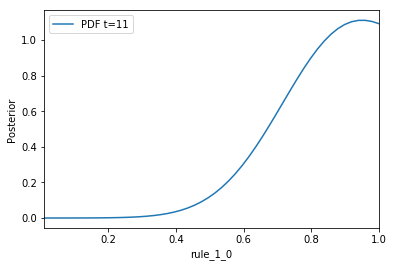

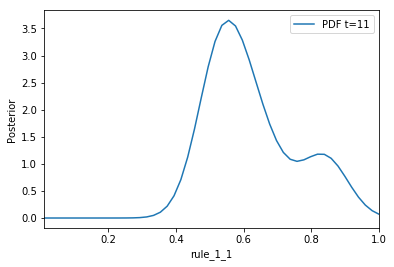

In [158]:
# Visualise results
from pyabc.visualization import plot_kde_1d
for (k,v) in metrics.items():
    fig, ax = plt.subplots()
    for t in range(history.max_t, history.max_t+1):
        df, w = history.get_distribution(m=0, t=t)
        plot_kde_1d(df, w,
                    xmin=v[0], xmax=v[1],
                    x=k, ax=ax,
                    label="PDF t={}".format(t))
    ax.legend();